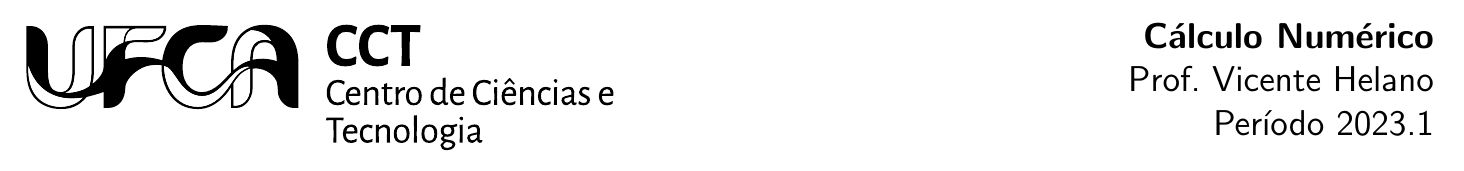

# Projeto 2

*Lagos de cratera*

## Equipe

1. Pedro Henrique Samuel Ferreira Galvão

## Situação problema

<p align="justify">Dentre as paisagens fantásticas que encontramos na natureza, os <i>lagos de cratera</i> são daquelas maravilhas que não cansamos de olhar.
Eles geralmente surgem em crateras de vulcões extintos ou, menos frequentemente, em crateras ocasionadas pelo impacto de meteoritos.
O <a href="https://en.wikipedia.org/wiki/Lonar_Lake">lago Lonar</a> (ao lado) é um dos poucos exemplares destes últimos.
Ele está localizado no distrito de Buldhana, Maharashtra, na Índia.
A seguir, aplicaremos o que aprendemos sobre mínimos quadrados para obter uma estimativa do volume da cratera que gerou este lago. </p>


## Objetivo

Nesta atividade, iremos estimar o volume da cratera do lago Lonar por intermédio do [método dos discos](https://pt.wikipedia.org/wiki/S%C3%B3lidos_de_revolu%C3%A7%C3%A3o#M%C3%A9todo_dos_discos). Basicamente, precisaremos:
  1. Definir a função raio $r(y) = c_1 y + c_0$;
  2. Definir os limites de integração $[a,b]$ ao longo do eixo $y$;
  3. Calcular a integral:
  $$
  \int_a^b \pi \left[r(y)\right]^2 \operatorname{d}\!y\text{.}
  $$

## Python Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Relevo atual

Primeiramente, vejamos uma vista de topo do lago Lonar.

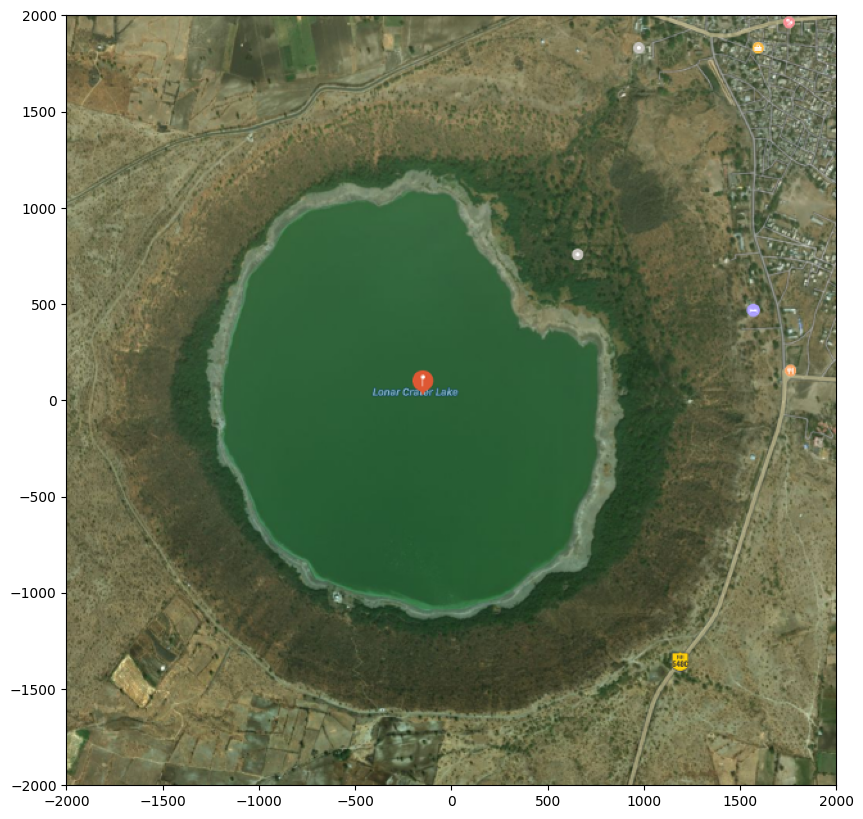

In [2]:
img = plt.imread("Imagens/lonar-topo.png")
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, extent=[-2000, 2000, -2000, 2000])

Observe que a cratera possui formato aproximadamente circular. O raio médio da borda da cratera é de 1800 metros. Por conveniência, definiremos um sistema de coordenadas local com origem no centro da lagoa.

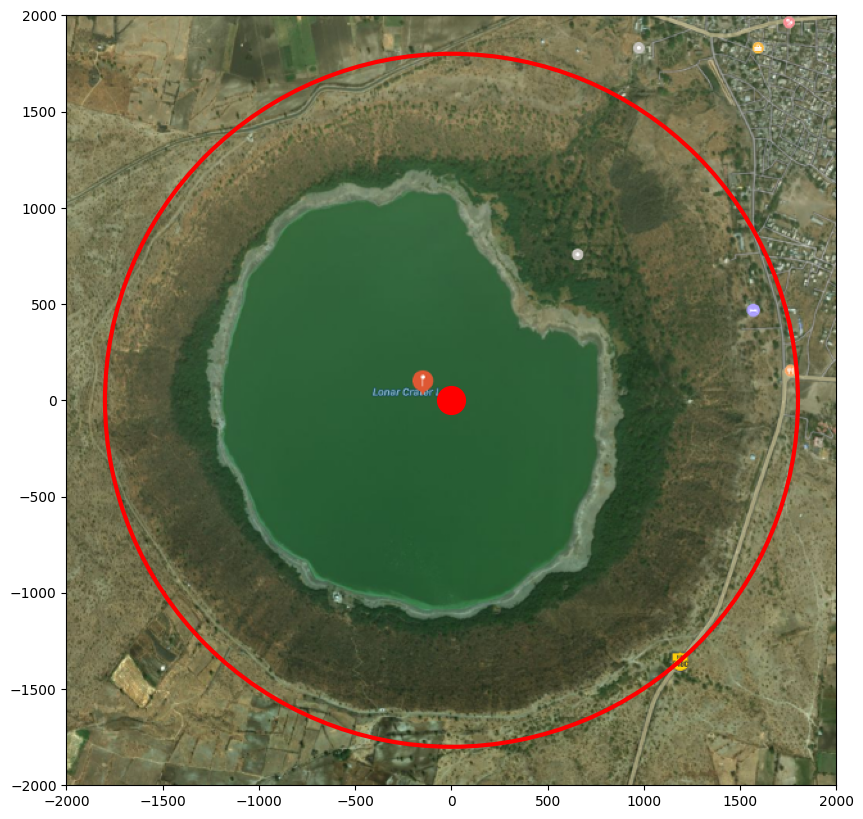

In [3]:
import matplotlib.patches as patches

circle = patches.Circle((0, 0), radius=1800, fill=None, linewidth=3, color='r')
ax.add_artist(circle)
ax.plot([0], [0], 'o', color='r', markersize=20)
fig

Com base na Figura 3 de Vijayan et al. (2013), obtemos o seguinte corte longitudinal na direção norte-sul:

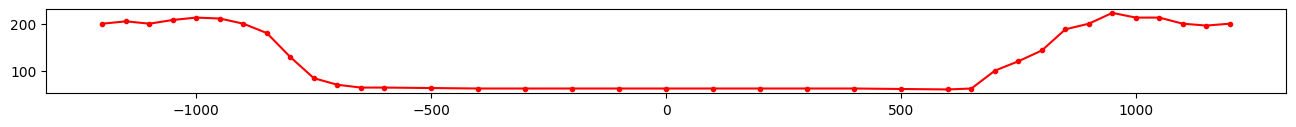

In [4]:
def carrega_elevação(batimetria):
    _x = []
    _y = []
    with open(batimetria) as file:
        n = 0
        for linha in file:
            token = linha.strip(' \n').split(' ')
            if token[0] == 'v':  # vértice
                _x.append(np.float64(token[1]))
                _y.append(np.float64(token[2]))
                n = n + 1

        return np.array(_x).reshape((n, 1)), np.array(_y).reshape((n, 1))


x0, y0 = carrega_elevação('batimetria.txt')

fig2, ax2 = plt.subplots(figsize=(16, 16))
ax2.set_aspect('equal')
plt.plot(x0, y0, color='r', marker='.')

## Função raio

Como dito anteriormente, utilizaremos uma reta $r(y) = c_1 y + c_0$ para aproximar a função que determina a variação do raio da seção transversal do sólido definido pela cratera. Esta função será obtida via mínimos quadrados, aplicado à rampa direita do corte longitudinal. Com efeito, aplicaremos o método dos mínimos quadrados aos pontos $(x_i,y_i)$ satisfazendo $650 \le x_i \le 950$.

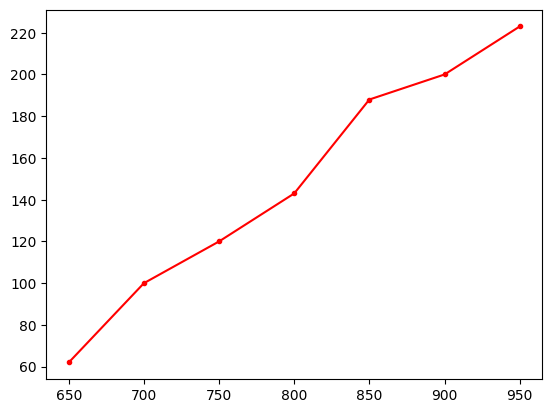

In [54]:
# 1. Guarde a posição dos pontos satisfazendo 650 <= x0[i] <= 950
rampa = np.array([[x, y] for x, y in zip(x0, y0) if 650 <= x <= 950])
plt.plot(rampa[:, 0], rampa[:, 1], color='r', marker='.')

In [55]:
# 2. Aplique o método dos mínimos quadrados para ajustar uma reta
#    Dica: utilize a função numpy.polyfit:
#          https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
_x0 = rampa[:, 0][:, 0]
_y0 = rampa[:, 1][:, 0]
c1, c0 = np.polyfit(_x0, _y0, 1)
def r(y): return c1*y + c0

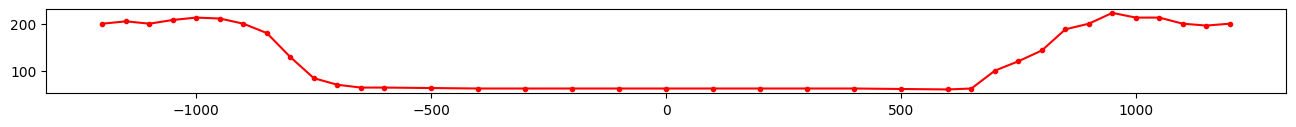

In [53]:
# 3. Desenhe a reta (verde) obtida na mesma figura do corte longitudinal, i.e., a 'fig2'

ax2.plot(range(650, 951), )

## Limite inferior de integração

Observe que o fundo da cratera é quase plano. Por isso, iremos aproximar o limite inferior de integração $a$ pela elevação média dos pontos a uma distância máxima de 650 metros do centro da cratera.

In [ ]:
# 1. Determine a elevação média para os pontos com -650 <= x <= 650

# seu código vem aqui

In [ ]:
# 2. Desenhe a reta horizontal definida por y = a, na cor verde

# seu código vem aqui

## Limite superior de integração

Para definirmos o limite superior de integração, iremos construir um corte da crosta terrestre desconsiderando a cratera. É como se reconstruíssemos a crosta antes do impacto do meteorito, desprezando os processos erosivos ocorridos desde então. O método descrito aqui é baseado na ideia das *malhas de mínimos quadrados* de [Sorkine and Cohen-Or](https://doi.org/10.1109/SMI.2004.1314506).

Primeiramente, classificamos os pontos dos dados de elevação em *livres* ou *fixos*.
Considere uma curva de elevação $P$ definida por $n$ pontos $(x_0,y_0)$, $(x_1,y_1)$, $\cdots$, $(x_{n-1},y_{n-1})$.
Um ponto $(x_i,y_i)$ é dito **livre** quando estiver contido no interior da cratera.
Caso contrário, este será **fixo**.
Esta noção de ponto livre/fixo será usada para forçar que a curva ajustada nos dê uma tendência dos pontos fixos, compatibilizando as posições dos pontos livres.
Tendo em vista que o raio médio da cratera é de 1800 metros, assumiremos que um ponto $(x_i,y_i)$ está no interior da cratera quando $|x| <= 900$ metros.

In [ ]:
# 1. Construa uma lista com os índices/números dos pontos fixos.
#    Lembre-se: os pontos fixos são aqueles a uma distância > 900 metros.
fixos = []

# seu código vem aqui

Cada ponto que compõe o corte da cratera será reposicionado, levando em consideração se este é fixo ou livre.
Manteremos os valores das abscissas intactos, enquanto que as ordenadas serão ajustadas.
Os pontos livres induzirão uma única equação e os pontos fixos estarão associados a duas, com exceção dos pontos extremos $(x_0,y_0)$ e $(x_{n-1},y_{n-1})$, que também induzirão apenas uma.
Com efeito, se um ponto $(x_i,y_i)$ é tal que $0 < i < n-1$, definimos sua nova ordenada $\tilde{y}_i$ como sendo a média das novas ordenadas de seus pontos vizinhos (à esquerda e à direita). Matematicamente, temos:

$$
\tilde{y}_i = \frac{1}{2}\left(\tilde{y}_{i-1} + \tilde{y}_{i+1}\right)
$$

que podemos escrever como a equação:

$$
-\tilde{y}_{i-1} + 2\tilde{y}_i - \tilde{y}_{i+1}= 0
$$

Isto nos fornecerá $n-2$ equações.

Agora, adicionaremos uma equação correspondendo a cada ponto fixo $(x_j,y_j)$:

\begin{equation}
\tilde{y}_j = y_j
\end{equation}

Como certamente teremos $m > 2$ pontos fixos, isto resultará em um sistema com mais equações do que incógnitas, cuja solução pode ser aproximada via mínimos quadrados. Montemos agora o sistema $\mathbf{A}\tilde{\mathbf{y}} = \mathbf{r}$.

In [ ]:
# 1. Precisamos montar a matriz do sistema de equações Aỹ = r descrito acima.

# seu código vem aqui

In [ ]:
# 2. Agora, montamos o vetor independente r do sistema Aỹ = r

# seu código vem aqui

Com o sistema pronto, podemos resolvê-lo usando a função  [`numpy.linalg.lstsq`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html), conforme abaixo:

In [ ]:
sol = np.linalg.lstsq(A, r, rcond=None)[0]
yt = np.zeros(y0.shape)
np.copyto(yt, sol)
ax2.plot(x0, yt, color='b')
fig2

O limite superior será definido como a média das cotas dos pontos da curva reconstruída localizados no interior da cratera, conforme definido anteriormente.

In [ ]:
# 1. Calcule o valor de 'b'

# seu código vem aqui

In [ ]:
# 2. Desenhe a reta y = b na cor 'magenta'

# seu código vem aqui

## Cálculo do volume

Agora, temos todas as informações necessárias para aproximarmos o volume da cratera pelo método dos discos. Integrando simbolicamente, obtemos:

$$
\int_a^b \pi \left[c_0 y + c_1\right]^2 \operatorname{d}\!y = \text{[coloque o resultado aqui usando LaTeX!]}
$$

Com isso, o volume da cratera será:

In [ ]:
V = np.float64(0.0)

# seu código vem aqui

print("%f m³" % V)

## Saiba mais

* Esta atividade foi inspirada no artigo: SORKINE, Olga; COHEN-OR, Daniel. [Least-squares meshes](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.387.8412&rank=2). In: Proceedings Shape Modeling Applications, 2004. IEEE, 2004. p. 191-199.

* Algumas informações sobre o lago Lonar foram obtidas nos artigos:

  - MALOOF, Adam C. et al. Geology of lonar crater, India. Bulletin, v. 122, n. 1-2, p. 109-126, 2010.
  - VIJAYAN, S.; VANI, K.; SANJEEVI, S. Topographical analysis of lonar crater using Cartosat-1 DEM. Journal of the Indian Society of Remote Sensing, v. 41, n. 2, p. 345-354, 2013.

<br>
<p>Vicente Helano<br>
UFCA | Centro de Ciências e Tecnologia</p>